<a href="https://colab.research.google.com/github/yyaprak/cpp_mysql/blob/main/gradient_boosting_trees_intensive_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb

warnings.filterwarnings("ignore")

#kaynak dosyayı yukleme
df = pd.read_csv('https://raw.githubusercontent.com/yyaprak/ml/main/covid19_dataset.csv')


#Hedef değişkenimiz INTUBATION oldugundan diğer verilerden ayırıyoruz
X = df.drop(['INTUBATION','INTENSIVE CARE','ID'],axis=1)


# y fonksiyon verilerini değişkene atama
y=df['INTENSIVE CARE']


print('INTENSIVE CARE')
print(y.value_counts())

y = np.where(df['INTENSIVE CARE'] == 'YES',1,0)
print(y)
# X tablosunda Nan olan verileri ortalamayla doldurma
X=X.fillna(X.mean())



INTENSIVE CARE
NO     1270
YES     169
Name: INTENSIVE CARE, dtype: int64
[0 0 0 ... 0 0 0]


Modelimizi kurmaya hazırız şimdi standart modelleme süreçlerini uygulayacağız.

1-Veriyi eğitim ve test alt-veri gruplarına ayırma.

2-Karar ağacı modeli oluşturma.

3-Modeli eğitim verisine ‘fit’ etme.

tahmin 0.9751737835153923
RMSE: 0.333333


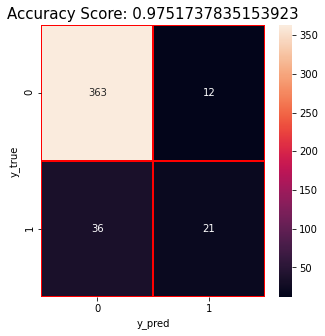

In [23]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree

data_dmatrix = xgb.DMatrix(data=X,label=y)

model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
                          silent=True, objective='binary:logistic', booster='gbtree')
model.fit(X_train,y_train)
#plot_tree(model,num_trees=4)
y_pred = model.predict(X_test)
y_true=y_test
score=model.score(X_train,y_train)
print("tahmin",score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)


#%% cm visualizaiton

import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

4.Görmediğimiz test verisine modele verip tahminde bulunma.

5a. Modelin başarı metrikleri: Confusion matrix

Modelin Sensitivit ve specifity başarı metrikleri formul kullanarak

In [24]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FN)
print("sensitivity",sensitivity)
print("specificity",specificity)

sensitivity 0.3684210526315789
specificity 0.9097744360902256


Modelin başarı metrikleri: Precision,recall,f1-score classification_report kullanarak

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['1', '0']))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       375
           0       0.64      0.37      0.47        57

    accuracy                           0.89       432
   macro avg       0.77      0.67      0.70       432
weighted avg       0.87      0.89      0.88       432



Modelin özniteliklerinin önem sıralamasını analiz etme.


              precision    recall  f1-score   support

           1       0.91      0.97      0.94       375
           0       0.64      0.37      0.47        57

    accuracy                           0.89       432
   macro avg       0.77      0.67      0.70       432
weighted avg       0.87      0.89      0.88       432



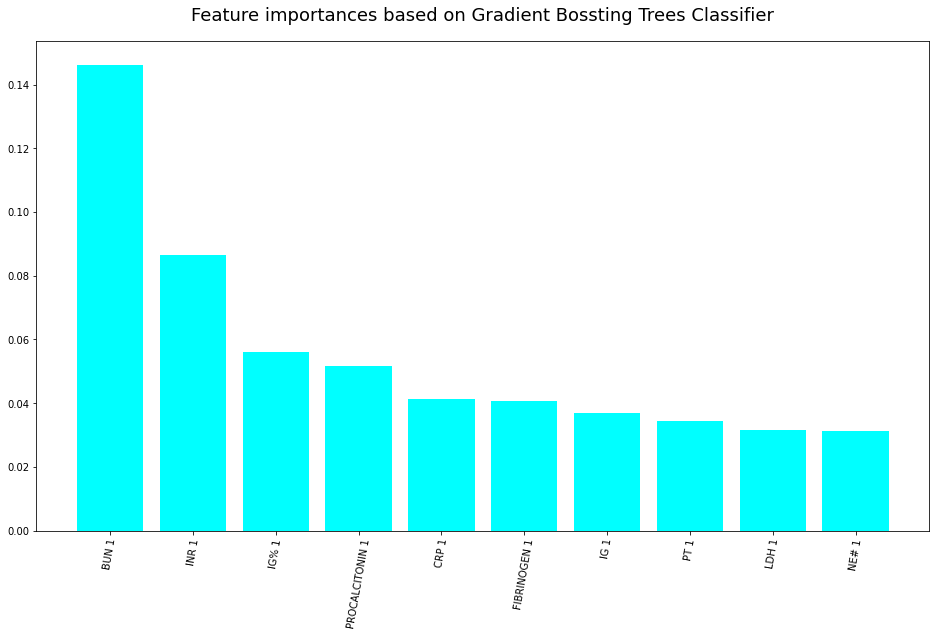

In [26]:
model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
                          silent=True, objective='binary:logistic', booster='gbtree')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions, target_names=['1', '0']))
plt.figure(figsize=(16, 9))

ranking = model.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Gradient Bossting Trees Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()